In [1]:
# Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Wine Dataset

wids = pd.read_csv('Wine.csv')

X = wids.iloc[:, :-1].values # defining X values
y = wids.iloc[:, -1].values # defining y values

In [3]:
# Splitting dataset into training and testing sets test predictions of customer segment on the new wine.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
# Feature Scaling before PCA to neutralise the range of features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Let us reduce the dimension of data using PCA.

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # fix n_components at 2 as they copture maximum variation in the data

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [6]:
# Let us train the Logistic model on the trainig set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) # predicting based on X_test

In [7]:
# Comparing predicted to true ones

pd.DataFrame([y_test, y_pred])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,3,2,1,2,2,1,3,2,2,...,2,2,2,3,1,1,2,1,1,1
1,1,3,2,1,2,1,1,3,2,2,...,2,2,2,3,1,1,2,1,1,1


Mostly the model has predicted the segments correctly.

In [8]:
# Let us evaluate the classification model

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

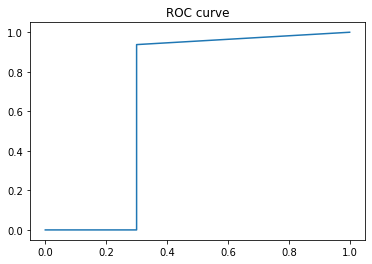

In [9]:
# Let us evaluate model using roc curve to avoid accuracy paradox

from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label = 2)

plt.plot(fpr, tpr) # Plotting ROC curve
plt.title('ROC curve')
plt.show()

